Submission Dicoding ML Abadi Suryo Setiyo

In [1]:
import tensorflow as tf

Download Dataset dari Dicoding 

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-02-14 09:05:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.18MB/s    in 35s     

2021-02-14 09:05:42 (8.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract Dataset

In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Preparasi direktori untuk Train dan Validation

In [4]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [6]:
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [7]:
paper_train_dir = os.path.join(train_dir, 'paper' )
rock_train_dir = os.path.join(train_dir, 'rock' )
scissors_train_dir = os.path.join(train_dir, 'scissors' )

In [8]:
paper_valid_dir = os.path.join(validation_dir, 'paper' )
rock_valid_dir = os.path.join(validation_dir, 'rock' )
scissors_valid_dir = os.path.join(validation_dir, 'scissors' )

In [9]:
os.mkdir(paper_train_dir)
os.mkdir(rock_train_dir)
os.mkdir(scissors_train_dir)
os.mkdir(paper_valid_dir)
os.mkdir(rock_valid_dir)
os.mkdir(scissors_valid_dir)

Split data dari Train dengan Validation dan dapatkan nama file

In [10]:
from sklearn.model_selection import train_test_split

rock_train_files, rock_valid_files = train_test_split(os.listdir(rock_dir), test_size = 0.40)
paper_train_files, paper_valid_files = train_test_split(os.listdir(paper_dir), test_size = 0.40)
scissors_train_files, scissors_valid_files = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [11]:
rock_train_dir

'/tmp/rockpaperscissors/train/rock'

Menyalin data ke direktori yang disiapkan sebelumnya untuk digunakan ImageDataGenerator

In [12]:
import shutil
for file_name in rock_train_files:
  shutil.copy(os.path.join(rock_dir, file_name), os.path.join(rock_train_dir, file_name))
for file_name in paper_train_files:
  shutil.copy(os.path.join(paper_dir, file_name), os.path.join(paper_train_dir, file_name))
for file_name in scissors_train_files:
  shutil.copy(os.path.join(scissors_dir, file_name), os.path.join(scissors_train_dir, file_name))
for file_name in rock_valid_files:
  shutil.copy(os.path.join(rock_dir, file_name), os.path.join(rock_valid_dir, file_name))
for file_name in paper_valid_files:
  shutil.copy(os.path.join(paper_dir, file_name), os.path.join(paper_valid_dir, file_name))
for file_name in scissors_valid_files:
  shutil.copy(os.path.join(scissors_dir, file_name), os.path.join(scissors_valid_dir, file_name))

Membuat objek ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

Menyiapkan objek datagen dengan dataset yang akan digunakan

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150
    batch_size=4,
    class_mode='categorical', # masalah klasifikasi lebih dari 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150
    batch_size=4,
    class_mode='categorical', # masalah klasifikasi lebih dari 2 kelas
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Membuat model CNN

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

Compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer = tf.optimizers.Adam(),
  metrics = ['accuracy']
)

In [17]:
model.fit(
    train_generator,
    steps_per_epoch = 40,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
)

Epoch 1/20
40/40 - 19s - loss: 1.1833 - accuracy: 0.3250 - val_loss: 1.0953 - val_accuracy: 0.4000
Epoch 2/20
40/40 - 17s - loss: 1.0942 - accuracy: 0.3938 - val_loss: 1.0575 - val_accuracy: 0.5500
Epoch 3/20
40/40 - 17s - loss: 1.0502 - accuracy: 0.4750 - val_loss: 0.9942 - val_accuracy: 0.4500
Epoch 4/20
40/40 - 17s - loss: 0.8580 - accuracy: 0.6000 - val_loss: 0.8206 - val_accuracy: 0.6000
Epoch 5/20
40/40 - 17s - loss: 0.7010 - accuracy: 0.7750 - val_loss: 0.5304 - val_accuracy: 0.8500
Epoch 6/20
40/40 - 17s - loss: 0.6098 - accuracy: 0.7375 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 7/20
40/40 - 17s - loss: 0.5648 - accuracy: 0.7875 - val_loss: 0.5590 - val_accuracy: 0.8000
Epoch 8/20
40/40 - 17s - loss: 0.5142 - accuracy: 0.8313 - val_loss: 0.4746 - val_accuracy: 0.7000
Epoch 9/20
40/40 - 17s - loss: 0.3861 - accuracy: 0.8562 - val_loss: 0.5368 - val_accuracy: 0.8500
Epoch 10/20
40/40 - 17s - loss: 0.4654 - accuracy: 0.8188 - val_loss: 0.2649 - val_accuracy: 0.9500
Epoch 11/

Main driver

Saving photo_2021-02-14 16.20.04.jpeg to photo_2021-02-14 16.20.04.jpeg
[[0. 0. 1.]]
photo_2021-02-14 16.20.04.jpeg
scissors


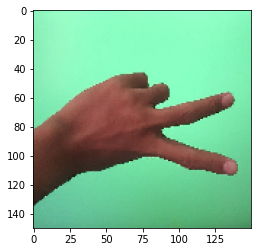

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')